In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
df = pd.read_csv('Housing.csv')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
df.shape

(545, 13)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


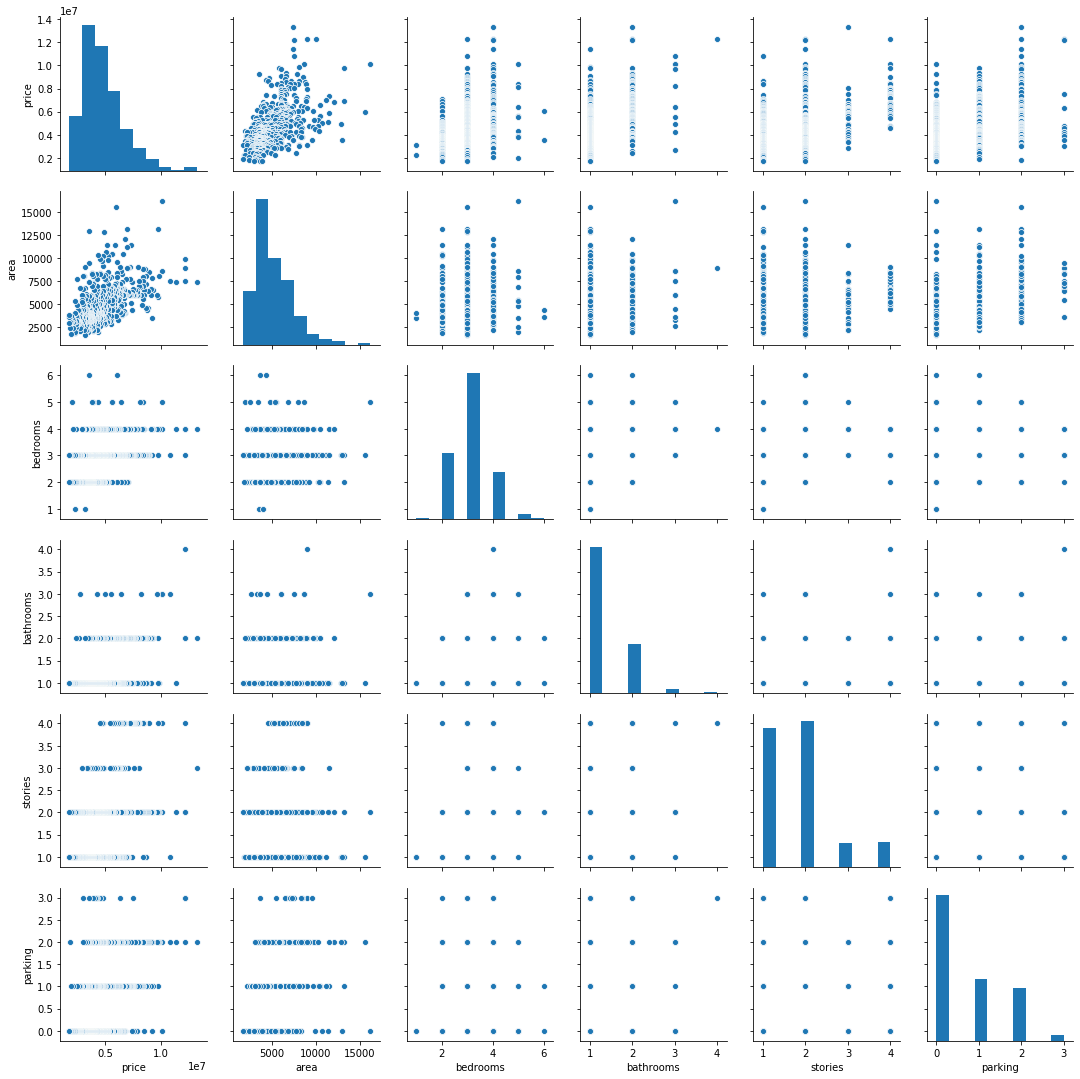

In [11]:
sns.pairplot(df)

In [12]:
corr = df.corr()

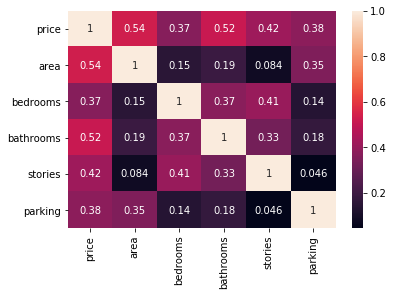

In [13]:
sns.heatmap(corr,annot=True)

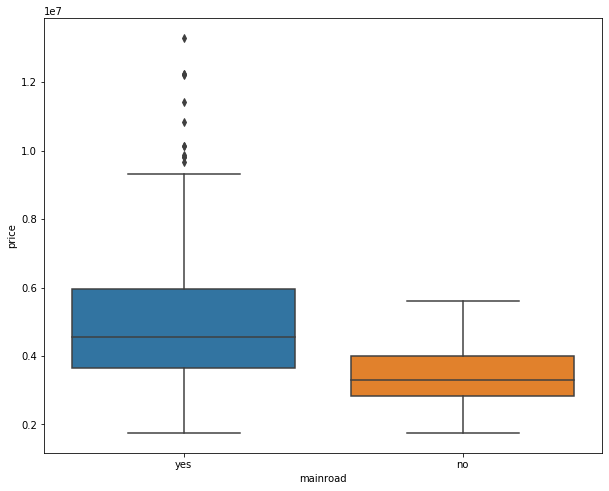

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(x='mainroad',y='price',data=df)

In [34]:
list1 =['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [35]:
df[list1].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [36]:
df[list1] = df[list1].apply(lambda x: x.map({'yes':1,'no':0}))

In [37]:
df[list1].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [27]:
# Reading the input
import ast,sys

# Storing the names in a variable 'name'
name = ['Reetesh', 'Shruti', 'Kaustubh', 'Vikas', 'Mahima', 'Akshay']
# Storing the responses in a variable 'repsonse'
response = ['No', 'Maybe', 'yes', 'Yes', 'maybe', 'Yes']



# Importing pandas and converting the read lists to a dataframe. You can print
# the dataframe and run the code to see what it will look like
import pandas as pd 
df = pd.DataFrame({'Name': name,'Response': response})

# Write your code here
list1=['Response']
df[list1] = df[list1].apply(lambda x: x.map({'Yes':1,'No':0,'Maybe':0.5,'yes':1,'no':0,'maybe':0.5}))
# Print the final DataFrame
print(df)

       Name  Response
0   Reetesh       0.0
1    Shruti       0.5
2  Kaustubh       1.0
3     Vikas       1.0
4    Mahima       0.5
5    Akshay       1.0


In [38]:
status = pd.get_dummies(df['furnishingstatus'],drop_first = True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [39]:
df = pd.concat([df,status],axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [40]:
df = df.drop('furnishingstatus',axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
df_train ,df_test = train_test_split(df,train_size=0.6,random_state=100)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()
list2 = ['area','bedrooms','bathrooms',
        'stories','parking','price']
df_train[list2] = scaler.fit_transform(df_train[list2])

In [48]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
80,0.422424,0.366420,0.4,0.0,0.333333,1,0,0,1,0,0.333333,1,1,0
197,0.277576,0.084829,0.4,0.5,0.333333,0,0,1,0,1,0.333333,0,1,0
496,0.081818,0.190426,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
259,0.235758,0.398099,0.2,0.0,0.000000,1,0,1,0,1,0.333333,0,0,0
174,0.303030,0.172826,0.4,0.0,0.333333,1,1,1,0,0,0.333333,1,0,1


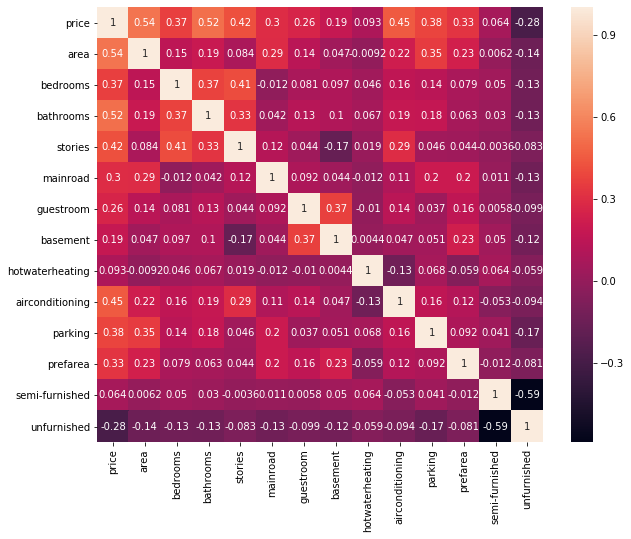

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [57]:
temp = df.corr().unstack()
dict(temp)

{('price', 'price'): 1.0,
 ('price', 'area'): 0.5359973457780788,
 ('price', 'bedrooms'): 0.36649402577386786,
 ('price', 'bathrooms'): 0.5175453394550077,
 ('price', 'stories'): 0.42071236618861413,
 ('price', 'mainroad'): 0.2968984892639757,
 ('price', 'guestroom'): 0.25551728993500045,
 ('price', 'basement'): 0.18705659793805243,
 ('price', 'hotwaterheating'): 0.09307284392139714,
 ('price', 'airconditioning'): 0.4529540842560462,
 ('price', 'parking'): 0.3843936486357239,
 ('price', 'prefarea'): 0.32977704986811035,
 ('price', 'semi-furnished'): 0.06365633818953613,
 ('price', 'unfurnished'): -0.28058735732512136,
 ('area', 'price'): 0.5359973457780788,
 ('area', 'area'): 1.0,
 ('area', 'bedrooms'): 0.15185848557453643,
 ('area', 'bathrooms'): 0.1938195310520514,
 ('area', 'stories'): 0.08399605092891933,
 ('area', 'mainroad'): 0.28887411412506786,
 ('area', 'guestroom'): 0.14029659048177065,
 ('area', 'basement'): 0.047416988564942884,
 ('area', 'hotwaterheating'): -0.009229236053

In [59]:
y_train = df_train.pop('price')
X_train = df_train

In [60]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
80,0.366420,0.4,0.0,0.333333,1,0,0,1,0,0.333333,1,1,0
197,0.084829,0.4,0.5,0.333333,0,0,1,0,1,0.333333,0,1,0
496,0.190426,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
259,0.398099,0.2,0.0,0.000000,1,0,1,0,1,0.333333,0,0,0
174,0.172826,0.4,0.0,0.333333,1,1,1,0,0,0.333333,1,0,1


In [61]:
import statsmodels.api as sm

In [62]:
X_train_sm = sm.add_constant(X_train['area'])

In [63]:
lr =sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()

In [64]:
lr_model.params

const    0.128585
area     0.459006
dtype: float64

In [65]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     128.4
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           2.60e-25
Time:                        00:21:08   Log-Likelihood:                 199.10
No. Observations:                 327   AIC:                            -394.2
Df Residuals:                     325   BIC:                            -386.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1286      0.014      9.420      0.000       0.102       0.155
area           0.4590      0.041     11.333      0.000       0.379       0.539
==============================================================================
Omnibus:                       64.674   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.328
Skew:                           0.959   Prob(JB):                     1.87e-34
Kurtosis:                       5.779   Cond. No.                         6.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X_train_sm = X_train[['area','bathrooms']]
X_train_sm = sm.add_constant(X_train_sm)
lr =sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()

In [67]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     130.3
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           3.05e-42
Time:                        00:25:37   Log-Likelihood:                 241.13
No. Observations:                 327   AIC:                            -476.3
Df Residuals:                     324   BIC:                            -464.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1074      0.012      8.795      0.000       0.083       0.131
area           0.4017      0.036     11.112      0.000       0.331       0.473
bathrooms      0.2722      0.028      9.746      0.000       0.217       0.327
==============================================================================
Omnibus:                       62.177   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.177
Skew:                           0.873   Prob(JB):                     6.75e-38
Kurtosis:                       6.085   Cond. No.                         6.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
X_train_sm = X_train[['area','bathrooms','bedrooms']]
X_train_sm = sm.add_constant(X_train_sm)
lr =sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     96.68
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           1.13e-44
Time:                        00:27:36   Log-Likelihood:                 249.41
No. Observations:                 327   AIC:                            -490.8
Df Residuals:                     323   BIC:                            -475.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.020      2.063      0.040       0.002       0.081
area           0.3979      0.035     11.265      0.000       0.328       0.467
bathrooms      0.2306      0.029      7.927      0.000       0.173       0.288
bedrooms       0.1865      0.046      4.098      0.000       0.097       0.276
==============================================================================
Omnibus:                       50.540   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.583
Skew:                           0.741   Prob(JB):                     3.26e-28
Kurtosis:                       5.664   Cond. No.                         8.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""